In [2]:
import torch
import math
from data_loader import NEFG3x3Set
from AE import AE
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# Download the MNIST Dataset
dataset = NEFG3x3Set("info_dat_pot_10_std.csv",
                     "data/3x12_16", "dat_pot_10_std", transform=True)

length = len(dataset)
train_split = math.floor(length*.7)
test_split = length - train_split

train_inds, test_inds = torch.utils.data.random_split(
    dataset, [train_split, test_split], generator=torch.Generator().manual_seed(42))


# Model Initialization
model = AE()

# Validation using MSE Loss function
loss_function = torch.nn.L1Loss()

# Using an Adam Optimizer with lr = 0.
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3)

train_data = torch.utils.data.DataLoader(dataset=train_inds, batch_size=32,
                                         shuffle=True)
test_data = torch.utils.data.DataLoader(dataset=test_inds, batch_size=32,
                                        shuffle=True)


In [3]:
epochs = 30
outputs = []
losses = []
local_loss  = 0
txt1 = "Epoch {epoch} / "+str(epochs)
txt2 = "Average training loss: {loss}"
txt3 = "Average test loss: {loss}"


for epoch in range(epochs):
    if epoch%10==0:
        clear_output(wait=True)
    print(txt1.format(epoch = epoch))
    for (inp, tar, _,_,_) in train_data:
        model.train()
        inp = inp.reshape(-1, 71*26).float()
        tar = tar.reshape(-1, 71*26).float()
        # Output of Autoencoder
        reconstructed = model(inp)

        # Calculating the loss function
        loss = loss_function(reconstructed, tar)
        
        local_loss=local_loss+loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    
    print(txt2.format(loss = local_loss/len(train_data)))
    losses.append(local_loss/len(test_data))
    local_loss = 0
    
    for (inp, tar, _,_,_) in test_data:
        model.eval()
        
        inp = inp.reshape(-1, 71*26).float()
        tar = tar.reshape(-1, 71*26).float()
        
        # Output of Autoencoder
        reconstructed = model(inp)

        # Calculating the loss function
        loss = loss_function(reconstructed, tar)
        local_loss+=loss

    
    print(txt3.format(loss = local_loss/len(test_data)))
    
    local_loss = 0



Epoch 20 / 30
Average training loss: 0.048119235783815384
Average test loss: 0.0524330697953701
Epoch 21 / 30
Average training loss: 0.048004839569330215
Average test loss: 0.05234232544898987
Epoch 22 / 30
Average training loss: 0.04826223477721214
Average test loss: 0.05242675170302391
Epoch 23 / 30
Average training loss: 0.04795081540942192
Average test loss: 0.050475507974624634
Epoch 24 / 30
Average training loss: 0.04766792431473732
Average test loss: 0.049167923629283905
Epoch 25 / 30
Average training loss: 0.04671263322234154
Average test loss: 0.05024847760796547
Epoch 26 / 30
Average training loss: 0.047922637313604355
Average test loss: 0.05009188875555992
Epoch 27 / 30
Average training loss: 0.047471869736909866
Average test loss: 0.05172459036111832
Epoch 28 / 30
Average training loss: 0.049214962869882584
Average test loss: 0.049965858459472656
Epoch 29 / 30
Average training loss: 0.04737401008605957
Average test loss: 0.049160413444042206


tensor(0.1098, grad_fn=<DivBackward0>)


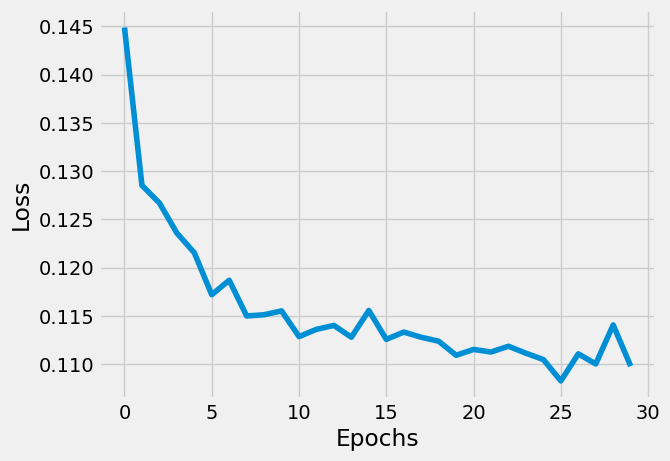

In [4]:
torch.save(model.state_dict(), "trained_models/3x12_16_pot_10.mp")
# torch.save(model, "trained_models/3x3_12_charge.pt")
# 0.001485698390752077
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Plotting the last 100 values
a = [i.detach().numpy() for i in losses]
print(losses[-1])
plt.plot(a)
plt.show()
# 0.04351815581321716

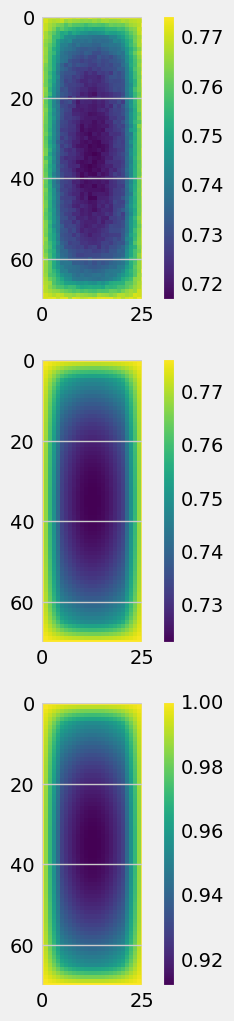

Prediction Loss: tensor(0.0063, grad_fn=<MeanBackward0>)
Input Loss: tensor(0.2055)


In [6]:

# 1600
# 1500 - example of very small data
# 1000 - very small nums
# 3000 - bigger numbers
(inp, tar, _, _, _) = dataset[1600]
inp = inp.reshape(71*26).float()

rec = model(inp).float().reshape(71, 26)

fig, ax = plt.subplots(nrows=3, figsize=(4, 12))
pos = ax[0].imshow(rec.detach().numpy())
c_bar = fig.colorbar(pos, ax=ax[0])
# print(rec.min(), rec.max())


tar = tar.reshape(71, 26).float()
pos = ax[1].imshow(tar.detach().numpy())
c_bar = fig.colorbar(pos, ax=ax[1])
# print(tar.min(), tar.max())


inp = inp.reshape(71, 26).float()
pos = ax[2].imshow(inp.detach().numpy())
c_bar = fig.colorbar(pos, ax=ax[2])
# print(inp.min(), inp.max())

plt.show()
print("Prediction Loss:", loss_function(tar, rec))

print("Input Loss:", loss_function(tar, inp))
